In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch

In [2]:
import h5py
Lab1_MNIST = h5py.File('MNISTdata.hdf5','r') # Loading the h5py file
data_in=np.array(Lab1_MNIST['input'])        #converting the file to numpy array (input data)
data_out=np.array(Lab1_MNIST['output'])      #converting the file to numpy array (output data)
print(data_in.shape)
print(data_out.shape)

(2000, 28, 28, 1)
(2000, 1)


In [3]:
# splitting the data into 70 % and 30% testing
train_X,test_X, train_y, test_y = train_test_split(data_in,data_out,test_size=0.3,random_state=21)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(1400, 28, 28, 1)
(600, 28, 28, 1)
(1400, 1)
(600, 1)


In [4]:
#reshaping the input data as (2000,784) and output data as column of 2000
X_train=train_X.reshape(-1,784)
X_test=test_X.reshape(-1,784)
y_train=train_y.reshape(1400)
y_test=test_y.reshape(600)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 784)
(600, 784)
(1400,)
(600,)


In [5]:
# coverting numpy array to tensor and datatype float(for input) and integer for output
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([1400, 784])
torch.Size([600, 784])
torch.Size([1400])
torch.Size([600])


In [6]:
#zipping the input data X and labels y together for test data and train data separately
train_data= list(zip(X_train,y_train))
test_data = list(zip(X_test,y_test))

In [7]:
# Loading data in batches of 64 size and checking it using for loop

trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
testloader = DataLoader(test_data,batch_size=64, shuffle=False)
for images, labels in trainloader:
    print('Batch shape:', images.size())
    break
for i in trainloader:
    print(i)

Batch shape: torch.Size([64, 784])
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([8, 2, 9, 5, 0, 5, 4, 4, 3, 4, 5, 9, 8, 7, 6, 4, 1, 1, 4, 9, 8, 4, 4, 8,
        7, 8, 6, 8, 5, 2, 8, 1, 2, 1, 6, 1, 6, 9, 2, 9, 8, 6, 2, 7, 7, 9, 5, 4,
        7, 0, 1, 4, 4, 0, 1, 4, 4, 0, 7, 9, 9, 3, 9, 3])]
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([1, 9, 9, 5, 7, 3, 8, 7, 6, 2, 0, 6, 2, 9, 1, 6, 3, 5, 5, 0, 2, 6, 3, 6,
        0, 1, 9, 1, 5, 3, 4, 4, 1, 1, 7, 5, 3, 9, 9, 0, 0, 4, 2, 2, 7, 3, 9, 3,
        1, 2, 1, 4, 9, 7, 5, 5, 4, 6, 3, 5, 4, 4, 3, 4])]
[tensor([[0., 0.,

In [8]:
# Creating a model class
class Model_1(nn.Module):
    def __init__(self,in_features=784,h1 = 50, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)  # input layer to hidden layer
        self.out = nn.Linear(h1,out_features) # hidden layer to output layer 
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = self.out(x)
        return F.log_softmax(x,dim=1)
torch.manual_seed(4)
model_1 = Model_1()
model_1

Model_1(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=10, bias=True)
)

In [9]:
# Showing number of parameters
for item in model_1.parameters():
    print(item.numel())

39200
50
500
10


In [10]:
# Setting up loss function and optimizer function
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),lr=1e-3,weight_decay=1e-4)

In [11]:
# Training the model with 100 epochs
import time
start_time = time.time()
epoch=100
trn_loss1=[]
tst_loss1=[]
tst_corr = []
trn_corr = []
for i in range(epoch):
    num_tst_corr = 0
    num_trn_corr = 0
    for b,(X_tr,y_tr) in enumerate(trainloader):
        b+=1
        y_predicted = model_1(X_tr)
        trnl_1=loss(y_predicted,y_tr)
        
        predicted = torch.max(y_predicted.data, 1)[1]    # this calculates the index of maximum value in one hot vector
        batch_corr = (predicted == y_tr).sum()   # this compares target value with model prediction
        num_trn_corr += batch_corr                  # summing up number of correct predictions by the model
        
        optimizer.zero_grad()
        trnl_1.backward()
        optimizer.step()
    
    trn_loss1.append(trnl_1.item())    
    if i%10==0:
        print(f' epoch: {i+1}     train_loss: {trnl_1.item()}')
    
    trn_corr.append(num_trn_corr)
    
    # Cecking the model for the test data (this part is not the par tof backward computation so without gradient)
    with torch.no_grad():
        for c,(X_tst,y_tst) in enumerate(testloader):
            c+=1
            y_val = model_1(X_tst)
            tstl_1=loss(y_val,y_tst)
            
            pred = torch.max(y_val.data, 1)[1]
            batch_corr_test = (pred == y_tst).sum()
            num_tst_corr += batch_corr_test
            
        tst_loss1.append(tstl_1.item())
        if i%10==0:
            print(f' epoch: {i+1}     test_loss: {tstl_1.item()}')
    tst_corr.append(num_tst_corr)
    
end_time = time.time()
total_time = end_time - start_time
print(f'total time: {total_time}')

 epoch: 1     train_loss: 1.970616102218628
 epoch: 1     test_loss: 1.8217889070510864
 epoch: 11     train_loss: 0.6098158955574036
 epoch: 11     test_loss: 0.6895685195922852
 epoch: 21     train_loss: 0.20342156291007996
 epoch: 21     test_loss: 0.428393691778183
 epoch: 31     train_loss: 0.3312320113182068
 epoch: 31     test_loss: 0.3382931053638458
 epoch: 41     train_loss: 0.21190182864665985
 epoch: 41     test_loss: 0.274639755487442
 epoch: 51     train_loss: 0.14447644352912903
 epoch: 51     test_loss: 0.37691032886505127
 epoch: 61     train_loss: 0.25813618302345276
 epoch: 61     test_loss: 0.22140301764011383
 epoch: 71     train_loss: 0.1811547428369522
 epoch: 71     test_loss: 0.2476498931646347
 epoch: 81     train_loss: 0.12401890754699707
 epoch: 81     test_loss: 0.21488362550735474
 epoch: 91     train_loss: 0.08926491439342499
 epoch: 91     test_loss: 0.31279394030570984
total time: 13.471290349960327


Text(0.5, 1.0, 'EPochs vs Loss')

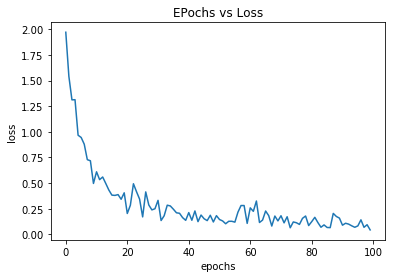

In [12]:
# PLotting the training loss vs epochs
plt.plot(range(epoch),trn_loss1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("EPochs vs Loss")

Text(0.5, 1.0, 'EPochs vs Loss')

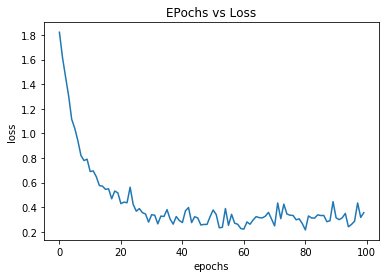

In [13]:
# Plotting the test loss vs epochs
plt.plot(range(epoch),tst_loss1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("EPochs vs Loss")

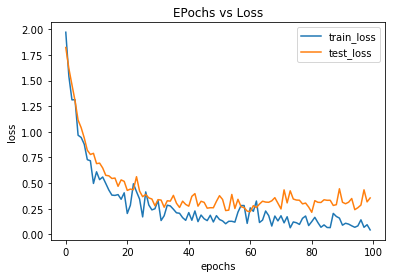

In [14]:
# Comparing the training loss and test loss
plt.plot(range(epoch),trn_loss1,label='train_loss')
plt.plot(range(epoch),tst_loss1,label='test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("EPochs vs Loss")
plt.legend()

In [15]:
# Accuracy of 1400 training data over each epoch in percentage
l_trn_accurate=[]
for i in trn_corr:
    l_trn_accurate.append(float(f'{i.item()/14:.2f}'))
print(l_trn_accurate)

[41.57, 65.29, 74.71, 76.36, 81.0, 83.79, 86.0, 87.14, 88.36, 89.64, 90.21, 91.14, 90.07, 91.29, 91.21, 91.93, 92.71, 93.0, 92.79, 93.21, 92.93, 93.71, 94.57, 94.0, 93.79, 94.79, 94.36, 94.86, 95.43, 94.5, 94.43, 95.21, 95.14, 95.29, 95.43, 95.0, 95.5, 96.07, 96.07, 96.0, 96.36, 96.29, 96.5, 96.57, 96.71, 96.29, 96.43, 96.36, 97.0, 97.0, 97.14, 96.64, 96.79, 97.5, 96.86, 96.79, 96.86, 96.79, 97.0, 97.07, 96.93, 96.93, 97.5, 97.86, 97.57, 97.71, 97.71, 97.36, 97.5, 97.43, 97.36, 97.21, 97.36, 97.07, 97.43, 97.93, 97.79, 97.57, 97.79, 97.29, 97.79, 97.64, 98.21, 97.93, 97.93, 97.71, 98.21, 97.64, 97.64, 97.79, 97.86, 97.71, 97.86, 98.29, 97.86, 98.0, 98.14, 97.86, 98.07, 97.71]


In [16]:
# Number of correct predictions out of 600 test data over each epoch
l_tst_accurate=[]
for i in tst_corr:
    l_tst_accurate.append(float(f'{i.item()/6:.2f}'))
print(l_tst_accurate)

[53.5, 68.5, 71.5, 77.33, 81.67, 82.33, 81.83, 82.17, 82.83, 83.17, 85.67, 87.33, 86.33, 84.5, 85.17, 85.67, 86.17, 85.5, 87.5, 86.5, 89.0, 86.5, 86.5, 85.0, 87.5, 87.67, 87.17, 87.67, 87.0, 88.33, 88.33, 86.83, 87.33, 87.67, 87.83, 87.17, 87.67, 88.67, 88.83, 89.5, 88.5, 87.67, 88.33, 88.67, 88.0, 88.17, 87.0, 87.17, 88.17, 88.17, 88.0, 88.17, 87.67, 88.17, 88.33, 88.0, 88.5, 88.83, 88.33, 88.67, 88.17, 88.67, 88.0, 88.67, 87.67, 89.0, 88.33, 88.5, 88.83, 88.0, 88.17, 88.83, 87.17, 87.67, 88.67, 87.17, 87.67, 88.33, 88.0, 87.67, 89.5, 87.5, 87.67, 88.17, 88.17, 88.17, 88.0, 88.33, 88.83, 86.17, 87.67, 87.83, 87.0, 87.67, 87.67, 87.5, 88.5, 88.17, 88.17, 88.33]


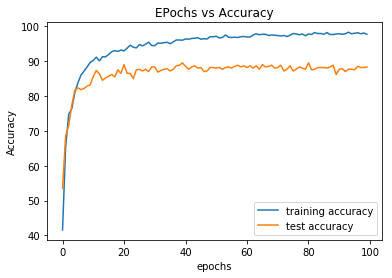

In [17]:
# Comparing the training accuracy and test accuracy
plt.plot(range(epoch),(l_trn_accurate),label='training accuracy')
plt.plot(range(epoch),(l_tst_accurate),label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title("EPochs vs Accuracy")
plt.legend()

In [19]:
for i,j in enumerate(range(5)):
    model_1.eval()
    with torch.no_grad():
        new_pred = model_1(test_data[i][0].view(-1,784)).argmax()
        if new_pred != test_data[i][1]:
            print(f"{i+1}.) Predicted value: {new_pred.item()}    Actual label:{test_data[i][1]}     Incorrect prediction")
        else:
            print(f"{i+1}.) Predicted value: {new_pred.item()}    Actual label:{test_data[i][1]}     Correct prediction")

1.) Predicted value: 4    Actual label:4     Correct prediction
2.) Predicted value: 1    Actual label:1     Correct prediction
3.) Predicted value: 3    Actual label:3     Correct prediction
4.) Predicted value: 4    Actual label:4     Correct prediction
5.) Predicted value: 6    Actual label:6     Correct prediction
